In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import numpy as np

# Descripción de la base de datos

La base de datos de BioID contiene 1521 imágenes en escala de grises de resoluxión 384 x 286 píxeles, cada una muestra la vista frontal de 23 personas de prueba distintas

In [2]:
dp=pd.read_csv("https://raw.githubusercontent.com/EisaacJC/ComputerVision/main/data_points.csv")

In [3]:
dp.shape

(30400, 2)

<AxesSubplot:xlabel='x', ylabel='y'>

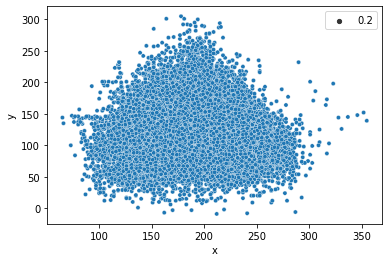

In [4]:
sns.scatterplot(data=dp, x="x", y="y", size=0.2)

In [5]:
valid=[]
direct=os.getcwd()+"/Im_Faces"
for f in os.listdir(direct):
    name, ext = os.path.splitext(f)
    if ext == '.pgm':
        valid.append("Im_Faces/"+f)

In [6]:
valid=np.sort(valid)
training=dp[:20].to_numpy()
img=cv2.imread(valid[0],cv2.IMREAD_GRAYSCALE)
img2=cv2.imread(valid[1],cv2.IMREAD_GRAYSCALE)
query_pts=dp[20:].to_numpy()

<AxesSubplot:xlabel='x', ylabel='y'>

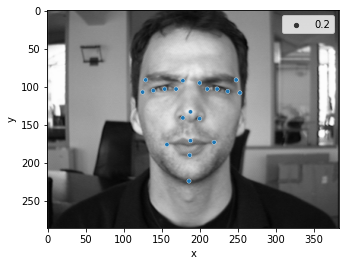

In [7]:
plt.imshow(cv2.imread(valid[0]))
sns.scatterplot(data=dp[:20], x="x", y="y", size=0.2)

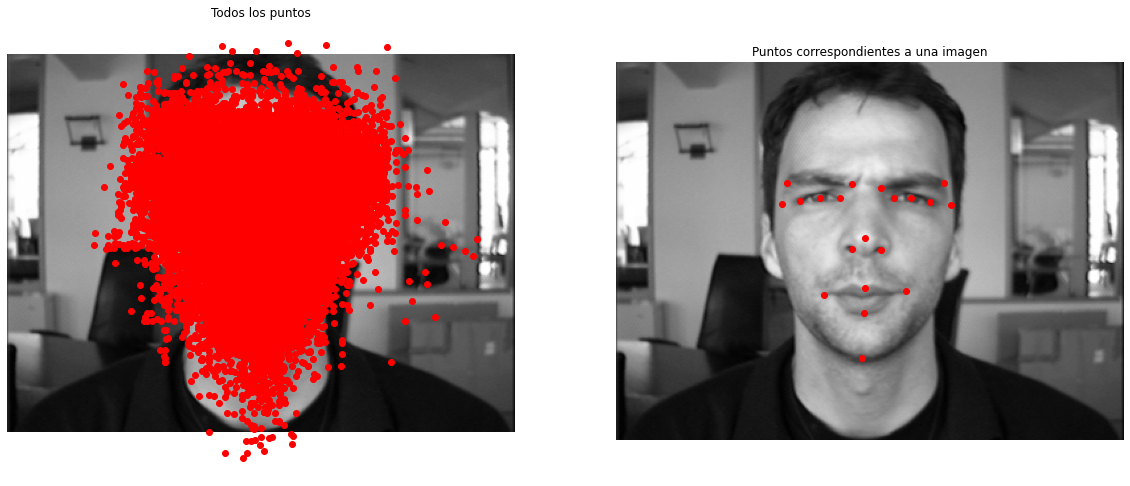

In [29]:
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(2,2,1)
plt.title('Todos los puntos')
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.scatter(*zip(*dp.to_numpy()),c="r")
plt.subplot(2,2,2)
plt.title("Puntos correspondientes a una imagen")
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.scatter(*zip(*dp[:20].to_numpy()),c="r")

In [9]:
cp=[]
almacen={"Indice":[],"Error":[]}
for i in range(int(len(dp)/20)):
    vec0=dp[0:20].to_numpy(dtype="float32")
    if i>0 and i<(int(len(dp/20))-1):
        vecx=dp[i*20:(i+1)*20].to_numpy(dtype="float32")
        kset=[]
        for k in range(len(vecx)):
            h,mask=cv2.findHomography(vecx,vec0, 0)
            vecp=np.divide(np.dot(h,np.append(vecx[k],1)),(np.dot(h,np.append(vecx[k],1))[2]))
            vecp=vecp[0:2]
            kset.append(vecp)
            cp.append(vecp)

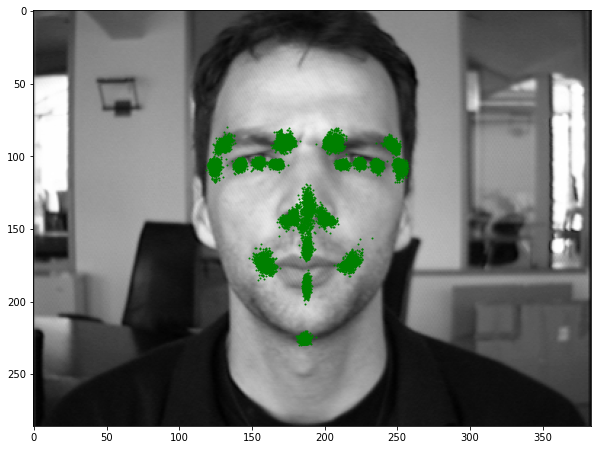

In [19]:
plt.rcParams["figure.figsize"] = (10,10)
df_control_points = pd.DataFrame (cp, columns = ['x', 'y'])
plt.plot(df_control_points['x'], df_control_points['y'], marker='o', color="green", markersize=1, linewidth=False)
plt.imshow(img, cmap='gray')
plt.show()

In [45]:
for i in range(1,int(len(dp)/20)):
        vecx=dp[i*20:(i+1)*20].to_numpy(dtype="float32")
        factor=1/(int(len(dp/20)))
        dif=factor*np.sqrt(factor*np.power(np.sum(vec0-vecp),2))
        std=factor*np.std(vec0-vecp)
        almacen["Indice"].append(i)
        almacen["Error"].append(std)

In [46]:
int(len(dp)/20)

1520

In [47]:
df=pd.DataFrame(almacen)

In [48]:
df=df.sort_values(by="Error", ascending=True)
df

,Indice,Error
4556,1519,0.002043
3538,501,0.002043
3539,502,0.002043
3540,503,0.002043
3541,504,0.002043
...,...,...
1516,1517,62.102902
1515,1516,62.102902
1514,1515,62.102902
1520,2,62.102902


In [49]:
idx=df[:99]["Indice"].to_list()

In [50]:
dpts=[]
for indice in idx:
    dpts.append(cp[indice])

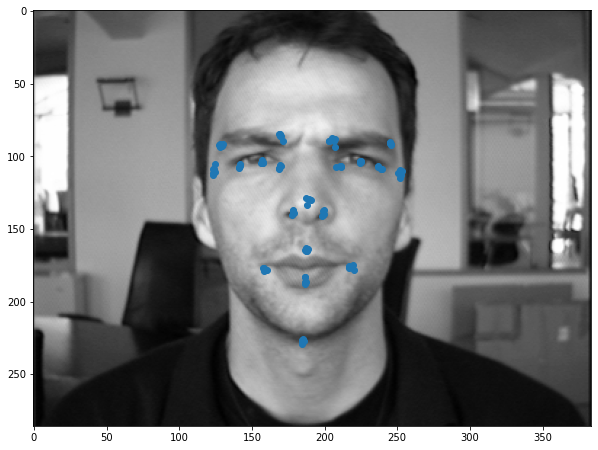

In [51]:
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(*zip(*dpts))
plt.imshow(img, cmap='gray')
plt.show()

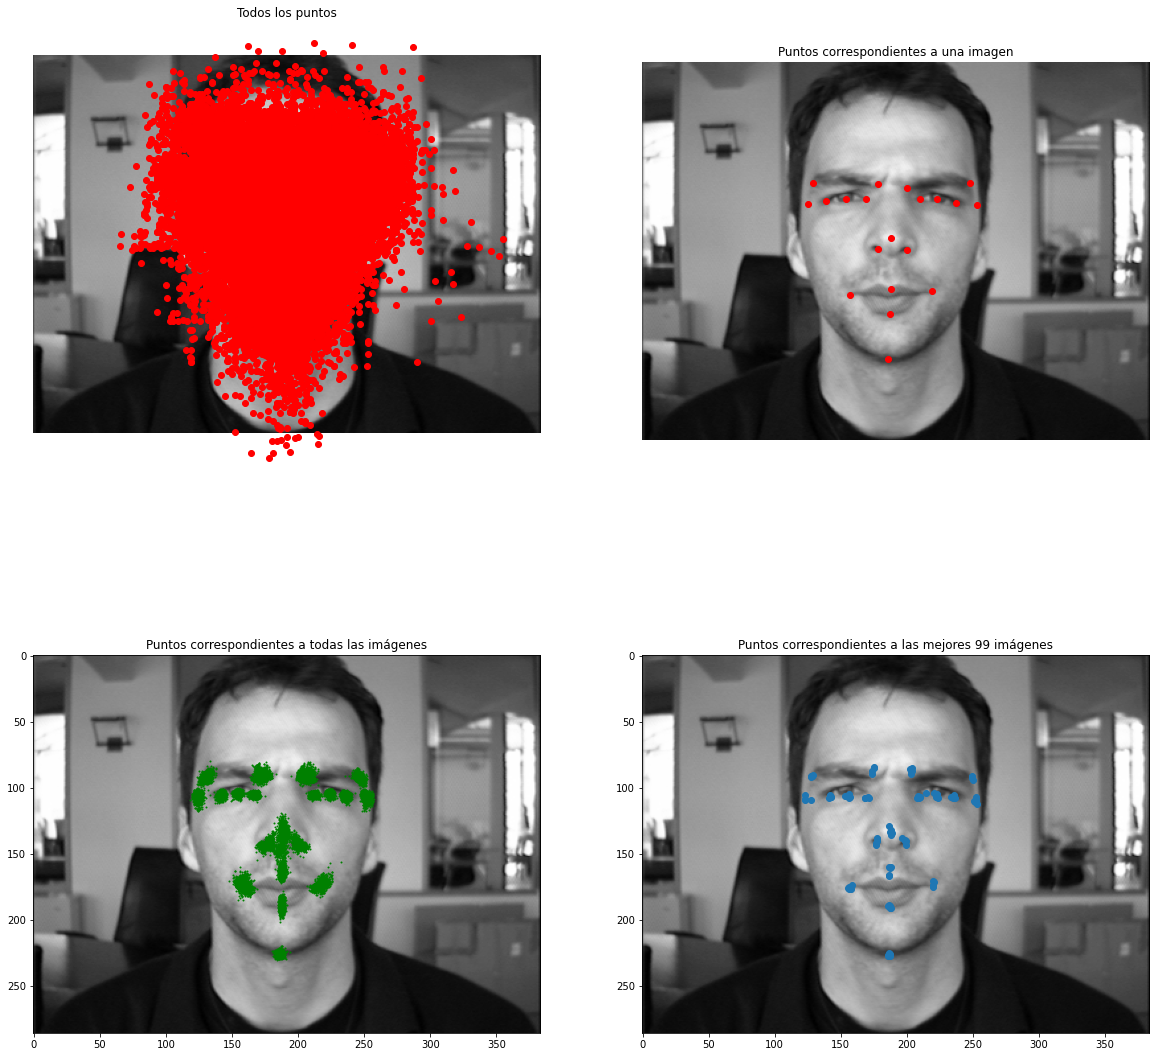

In [34]:
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(2,2,1)
plt.title('Todos los puntos')
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.scatter(*zip(*dp.to_numpy()),c="r")
plt.subplot(2,2,2)
plt.title("Puntos correspondientes a una imagen")
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.scatter(*zip(*dp[:20].to_numpy()),c="r")
plt.subplot(2,2,3)
plt.title("Puntos correspondientes a todas las imágenes")
plt.rcParams["figure.figsize"] = (10,10)
df_control_points = pd.DataFrame (cp, columns = ['x', 'y'])
plt.plot(df_control_points['x'], df_control_points['y'], marker='o', color="green", markersize=1, linewidth=False)
plt.imshow(img, cmap='gray')
plt.subplot(2,2,4)
plt.title("Puntos correspondientes a las mejores 99 imágenes")
plt.scatter(*zip(*dpts))
plt.imshow(img, cmap='gray')
plt.show()

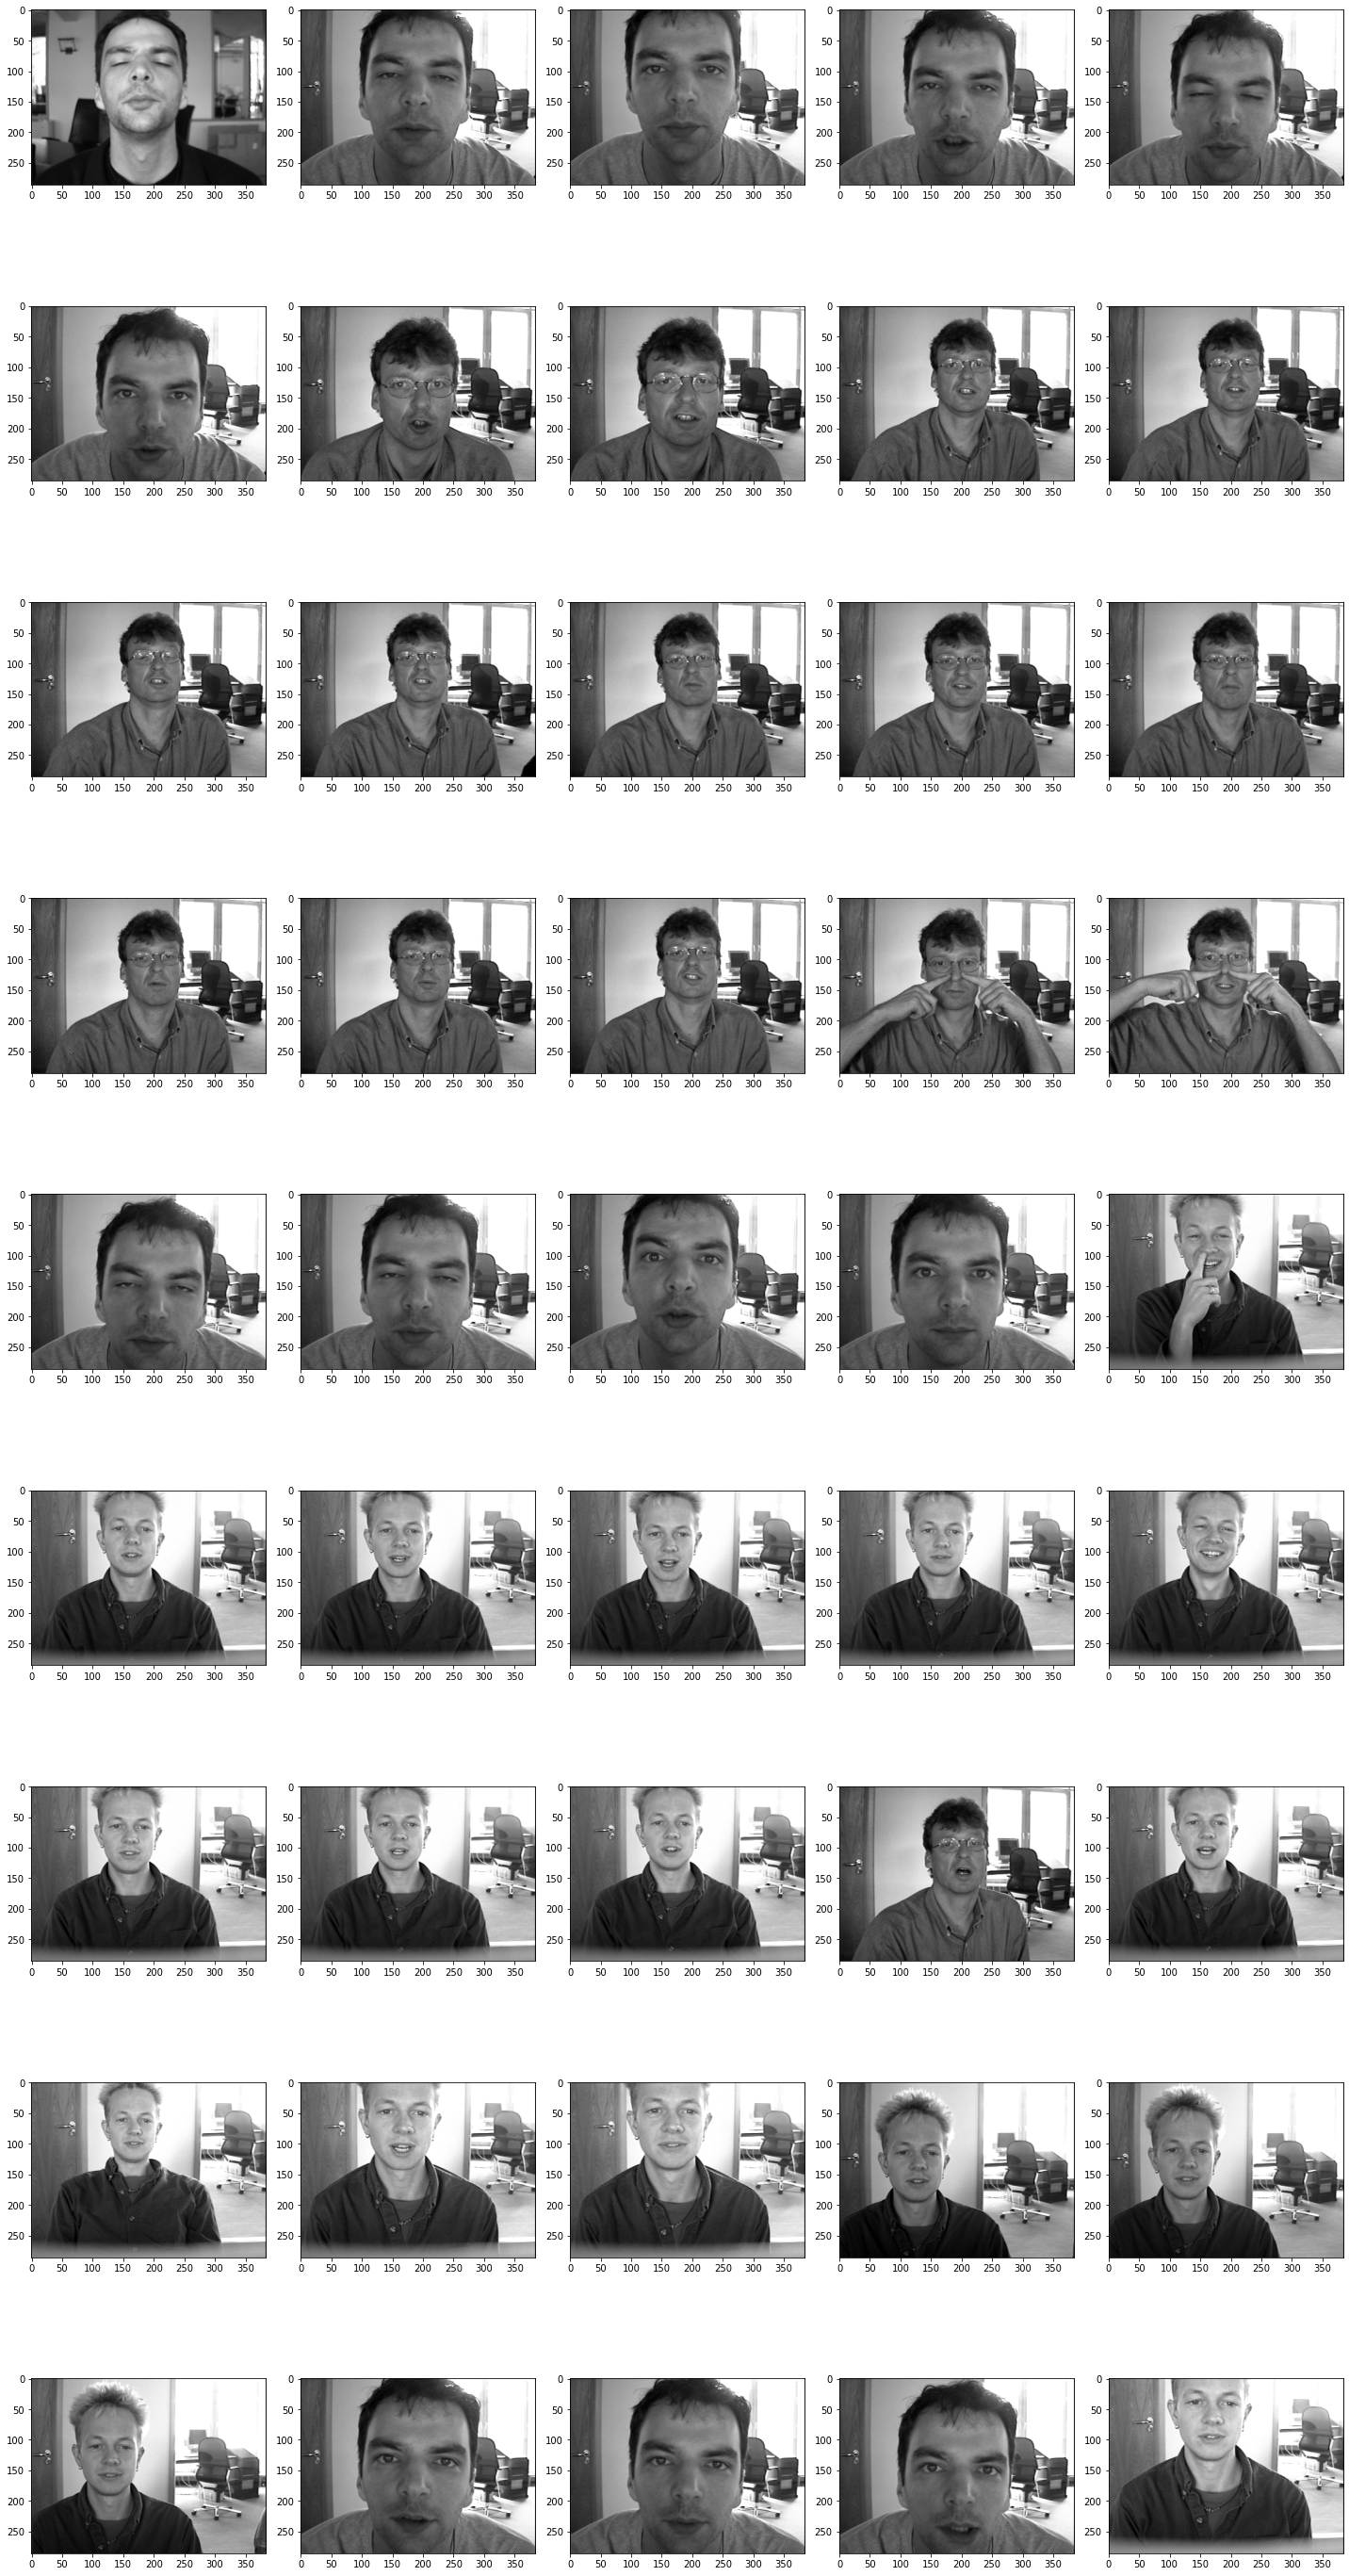

In [36]:
plt.rcParams["figure.figsize"] = (20,40)
imgs=[]
for value in idx:
    imgs.append(cv2.imread(valid[value],cv2.IMREAD_GRAYSCALE))
rows = 9
cols = 5
axes=[]
fig=plt.figure()
for a in range(rows*cols):
    b=imgs[a]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    if a==100:
        subplot_title=("Puntuación: ")
    else:
        subplot_title=("")

    axes[-1].set_title(subplot_title)  
    plt.imshow(b, cmap="gray")
fig.tight_layout()    

plt.show()

plt.rcParams["figure.figsize"] = (20,40)
imgs=[]
for value in lista:
    imgs.append(cv2.imread(valid[value],cv2.IMREAD_GRAYSCALE))
rows = 18
cols = 5
axes=[]
fig=plt.figure()
for a in range(rows*cols):
    b=imgs[a]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    if a==100:
        subplot_title=("Puntuación: ")
    else:
        subplot_title=("")

    axes[-1].set_title(subplot_title)  
    plt.imshow(b, cmap="gray")
fig.tight_layout()    

plt.show()